# Assignment 11- Data Processing with Caret

This code builds decision trees and random forests on the "adult" data set with the "caret" package. Pre-processing techniques provided in the "caret" package are used. Several methods of pre-processing techniques are used to create a variety of models which are then compared.

### 1. Replace all the missing values with NA

In [1]:
setwd("~/Data Analysis Practice Data Sets")
getwd()
adult <- read.csv("adult_data.csv", header = FALSE, na.strings = " ?")
names(adult) <- c("age", "workclass", "fnlwgt", "education", "education_num", 
                  "marital_status", "occupation", "relationship", "race", "sex",
                  "capital_gain", "capital_loss", "hours_per_week", "native_country", "class") 

[1] "C:/Users/student/Documents/Data Analysis Practice Data Sets"

### 2. Replace the categorical missing values by the mode of the corresponding variables

In [2]:
most_frequent <- function(x){
   unique_x <- unique(x)
   unique_x[which.max(tabulate(match(x, unique_x)))]
}

for (i in which(sapply(adult, is.factor))){
    adult[is.na(adult[,i]), i] <- most_frequent(adult[,i])
}

### 3. Replace the numeric missing values by the median using caret

In [3]:
library(caret)
preProcess_adult <- preProcess(adult, method="medianImpute")
adult_clean <- predict(preProcess_adult, newdata = adult)

adult_no_impute <- adult
adult_clean13 <- adult_clean

Loading required package: lattice
Loading required package: ggplot2


### 4. The variable "native country" has 16 categories. Group the categories of this variable into 5 categories.  Do the same for all categorical variables with more than 10 categories. 

In [6]:
#str(adult_clean)

#education
#levels(adult_clean$education)
simplify <- function(data)
{
data$education_new[data$education %in% c(" 1st-4th", " 5th-6th", 
                                                       " 7th-8th", " 9th", " 10th",
                                                        " 11th", " 12th", 
                                                        " Preschool")] <- " Dropout"
data$education_new[data$education %in% c(" HS-grad")] <- " HS-grad"
data$education_new[data$education %in% c(" Assoc-acdm", " Assoc-voc", 
                                                      " Some-college")] <- " Some-college"
data$education_new[data$education %in% c(" Bachelors")] <- " Bachelors"
data$education_new[data$education %in% c(" Doctorate", " Masters", 
                                                        " Prof-school")] <- " Post_grad_schooling"
data$education_new <- as.factor(data$education_new)

#occupation
#levels(data$occupation)
data$occupation_new <- ifelse(data$occupation %in% c( " Protective-serv", 
                                                                    " Armed-Forces"),
                                                                    " Safety_or_Forces", NA)
data$occupation_new[data$occupation %in% c(" Tech-support"," Machine-op-inspct",
                                             " Craft-repair")] <- " Tech_engineer"
data$occupation_new[data$occupation %in% c(" Sales", 
                                            " Exec-managerial", " Adm-clerical", 
                                            " Prof-specialty", " Other-service")] <- " Office_job"
data$occupation_new[data$occupation %in% c(" Farming-fishing", " Handlers-cleaners",
                                            " Priv-house-serv",
                                            " Transport-moving")] <- " Blue_collar"
data$occupation_new <- as.factor(data$occupation_new)

#native country
library(countrycode)
data$native_continent <- factor(countrycode(sourcevar = data[,"native_country"],
                                 origin = "country.name",
                                 destination = "continent"))

data$native_country = NULL
data$education = NULL
data$occupation = NULL
return(data)
}

# Create data sets for the rest of the assignment
adult_clean <- simplify(adult_clean)
adult_clean9 <- simplify(adult_no_impute)
adult_clean10 <- simplify(adult_no_impute)
adult_clean11 <- adult_clean

str(adult_clean)


'data.frame':	32561 obs. of  15 variables:
 $ age             : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass       : Factor w/ 8 levels " Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt          : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education_num   : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status  : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ relationship    : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race            : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex             : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain    : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week  : int  40 13 40 40 40 40 16 45 50 40 ...
 $ class           : Factor w/ 2 levels " <=50K"," >50K": 1 1 1 1 1 1 1 2 2 2 ...
 $ education_new   : Factor w/ 5 levels

### 5. Encoding categorical variable using one hot encoding (dummy encoding) 

In [7]:
library(caret)
adult_clean$class <- as.numeric(adult_clean$class)
dummy <- dummyVars( ~ ., data = adult_clean)
adult_hot <- data.frame(predict(dummy, newdata = adult_clean))


adult_hot$class[adult_hot$class == 1] <- " <=50K"
adult_hot$class[adult_hot$class == 2] <- " >50K"

head(adult_hot, 3)

age,workclass..Federal.gov,workclass..Local.gov,workclass..Never.worked,workclass..Private,workclass..Self.emp.inc,workclass..Self.emp.not.inc,workclass..State.gov,workclass..Without.pay,fnlwgt,...,education_new..Some.college,occupation_new..Blue_collar,occupation_new..Office_job,occupation_new..Safety_or_Forces,occupation_new..Tech_engineer,native_continent.Africa,native_continent.Americas,native_continent.Asia,native_continent.Europe,native_continent.Oceania
39,0,0,0,0,0,0,1,0,77516,...,0,0,1,0,0,0,1,0,0,0
50,0,0,0,0,0,1,0,0,83311,...,0,0,1,0,0,0,1,0,0,0
38,0,0,0,1,0,0,0,0,215646,...,0,1,0,0,0,0,1,0,0,0


### 6. Scale and center the data

In [8]:
preProcess_Scaled <- preProcess(adult_hot, method=c("center", "scale"))

adult_scaled <- predict(preProcess_Scaled, newdata = adult_hot)

head(adult_scaled, 3)

age,workclass..Federal.gov,workclass..Local.gov,workclass..Never.worked,workclass..Private,workclass..Self.emp.inc,workclass..Self.emp.not.inc,workclass..State.gov,workclass..Without.pay,fnlwgt,...,education_new..Some.college,occupation_new..Blue_collar,occupation_new..Office_job,occupation_new..Safety_or_Forces,occupation_new..Tech_engineer,native_continent.Africa,native_continent.Americas,native_continent.Asia,native_continent.Europe,native_continent.Oceania
0.03067009,-0.1742924,-0.2620933,-0.01466359,-1.7479503,-0.1883864,-0.2909312,4.9076243,-0.02073967,-1.0635944,...,-0.6532892,-0.3800716,0.7537436,-0.1436119,-0.5246838,-0.04962764,0.2027753,-0.1450532,-0.1275164,-0.02073967
0.83709613,-0.1742924,-0.2620933,-0.01466359,-1.7479503,-0.1883864,3.4371330,-0.2037583,-0.02073967,-1.0086915,...,-0.6532892,-0.3800716,0.7537436,-0.1436119,-0.5246838,-0.04962764,0.2027753,-0.1450532,-0.1275164,-0.02073967
-0.04264137,-0.1742924,-0.2620933,-0.01466359,0.5720811,-0.1883864,-0.2909312,-0.2037583,-0.02073967,0.2450747,...,-0.6532892,2.6310021,-1.3266704,-0.1436119,-0.5246838,-0.04962764,0.2027753,-0.1450532,-0.1275164,-0.02073967


### 7. Split the data into training (70%) and testing (30%) with the seeding set to be 2018 [including the code: set.seed(2018)]. Build a decision tree and report the accuracy and balanced accuracy

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7028  1151
     >50K     388  1201
                                          
               Accuracy : 0.8424          
                 95% CI : (0.8351, 0.8496)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5154          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9477          
            Specificity : 0.5106          
         Pos Pred Value : 0.8593          
         Neg Pred Value : 0.7558          
             Prevalence : 0.7592          
         Detection Rate : 0.7195          
   Detection Prevalence : 0.8373          
      Balanced Accuracy : 0.7292          
                                          
       'Positive' Class :  <=50K          
                                          

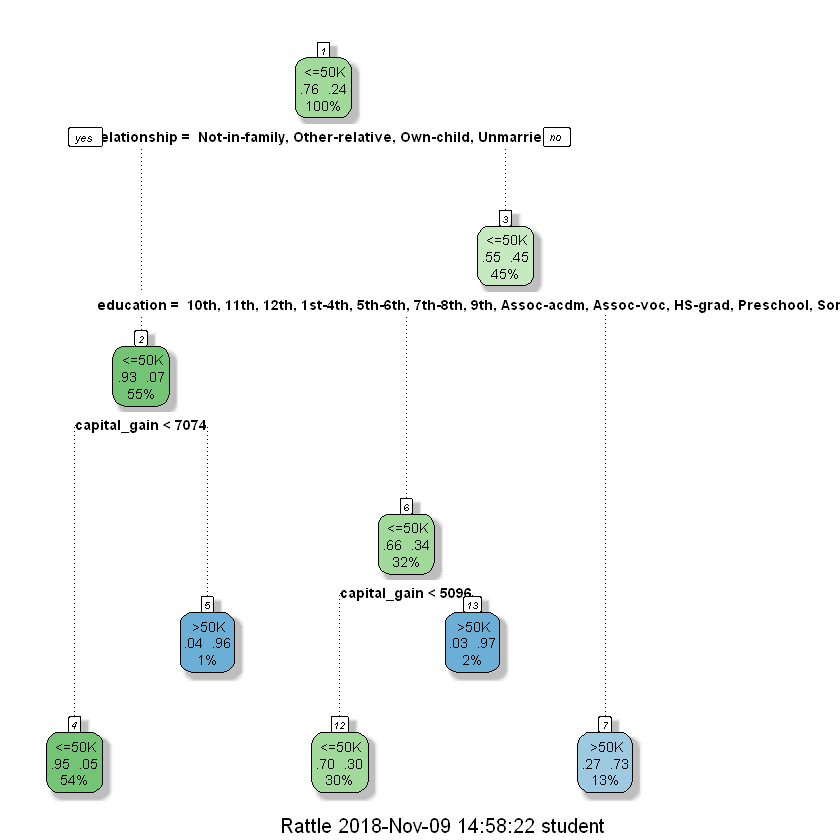

In [9]:
set.seed(2018)
split <- createDataPartition(adult_scaled$class, p = .7, list = FALSE, times = 1)
adult_train <- adult[split,]
adult_test <- adult[-split,]

library(rpart)
decision_tree <- rpart(class~., data = adult_train, method = "class")

library(rattle)
fancyRpartPlot(decision_tree)

predicting_test <- predict(decision_tree, adult_test, type = "class")

conf_matrix <- confusionMatrix(data = predicting_test, reference = adult_test$class)
conf_matrix

### 8. Build a random forest using the ranger package.  Report the accuracy and balanced accuracy

In [10]:
library(ranger)

random_forest_adult <- ranger(class ~ ., data = adult_train)
rf_predict <- predict(random_forest_adult, data = adult_test)$predictions
rf_cm <- confusionMatrix(data = rf_predict, adult_test$class)
rf_cm


Attaching package: 'ranger'

The following object is masked from 'package:rattle':

    importance



Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   6952   886
     >50K     464  1466
                                          
               Accuracy : 0.8618          
                 95% CI : (0.8548, 0.8686)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5973          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9374          
            Specificity : 0.6233          
         Pos Pred Value : 0.8870          
         Neg Pred Value : 0.7596          
             Prevalence : 0.7592          
         Detection Rate : 0.7117          
   Detection Prevalence : 0.8024          
      Balanced Accuracy : 0.7804          
                                          
       'Positive' Class :  <=50K          
                                          

### 9. Redo 3 with missing values being replaced by the mean.  Rebuild the model and report the models' performances (the accuracy and balanced accuracy). 

age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,class,education_new,occupation_new,native_continent
39,State-gov,77516,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K,Bachelors,Office_job,Americas
50,Self-emp-not-inc,83311,13,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K,Bachelors,Office_job,Americas
38,Private,215646,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K,HS-grad,Blue_collar,Americas


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7028  1151
     >50K     388  1201
                                          
               Accuracy : 0.8424          
                 95% CI : (0.8351, 0.8496)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5154          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9477          
            Specificity : 0.5106          
         Pos Pred Value : 0.8593          
         Neg Pred Value : 0.7558          
             Prevalence : 0.7592          
         Detection Rate : 0.7195          
   Detection Prevalence : 0.8373          
      Balanced Accuracy : 0.7292          
                                          
       'Positive' Class :  <=50K          
                                          

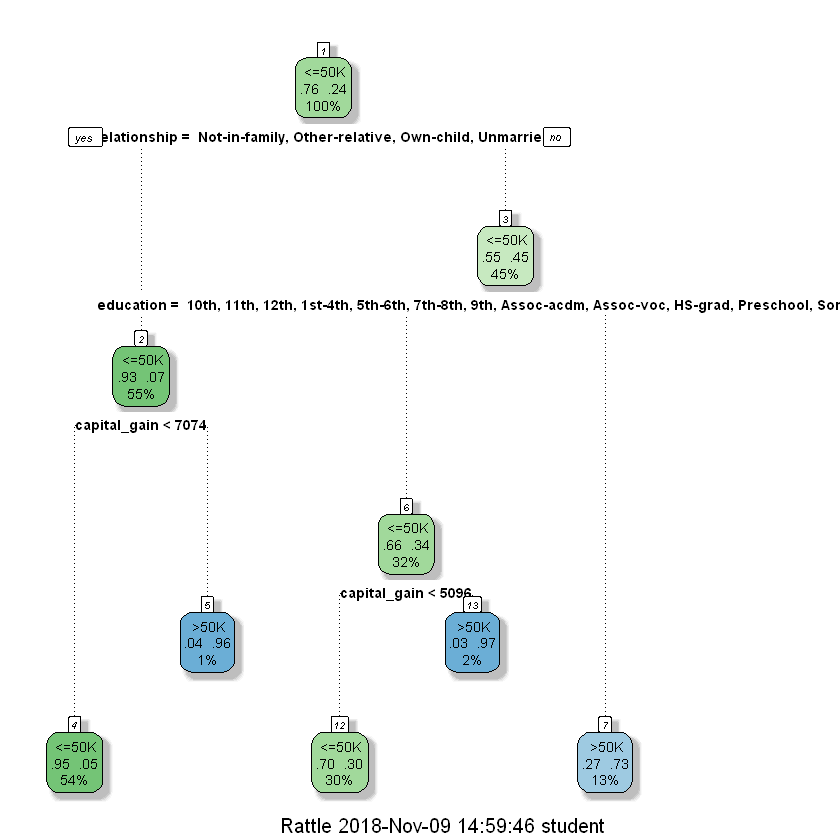

In [11]:
head(adult_clean9, 3)
for (i in which(sapply(adult_clean9, is.numeric))){
     adult_clean9[is.na(adult_clean9[,i]), i] <- mean(adult_clean9[,i], na.rm = TRUE)
}

#hot code the data
adult_clean9$class <- as.numeric(adult_clean9$class)
dummy <- dummyVars( ~ ., data = adult_clean9)
adult_hot9 <- data.frame(predict(dummy, newdata = adult_clean9))

adult_hot9$class[adult_hot9$class == 1] <- " <=50K"
adult_hot9$class[adult_hot9$class == 2] <- " >50K"

preProcess_Scaled9 <- preProcess(adult_hot9, method=c("center", "scale"))
adult_scaled9 <- predict(preProcess_Scaled9, newdata = adult_hot9)

set.seed(2018)
split9 <- createDataPartition(adult_scaled9$class, p = .7, list = FALSE, times = 1)
adult_train9 <- adult[split9,]
adult_test9 <- adult[-split9,]

decision_tree9 <- rpart(class~., data = adult_train9, method = "class")

fancyRpartPlot(decision_tree9)

predicting_test9 <- predict(decision_tree9, adult_test9, type = "class")

conf_matrix9 <- confusionMatrix(data = predicting_test9, reference = adult_test9$class)
conf_matrix9

### 10.	Redo 3 with missing values being replaced by the "knn" imputation method.  Rebuild the model and report the models' performances (the accuracy and balanced accuracy)

age,workclass,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,class,education_new,occupation_new,native_continent
39,State-gov,77516,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K,Bachelors,Office_job,Americas
50,Self-emp-not-inc,83311,13,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K,Bachelors,Office_job,Americas
38,Private,215646,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K,HS-grad,Blue_collar,Americas


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7028  1151
     >50K     388  1201
                                          
               Accuracy : 0.8424          
                 95% CI : (0.8351, 0.8496)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5154          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9477          
            Specificity : 0.5106          
         Pos Pred Value : 0.8593          
         Neg Pred Value : 0.7558          
             Prevalence : 0.7592          
         Detection Rate : 0.7195          
   Detection Prevalence : 0.8373          
      Balanced Accuracy : 0.7292          
                                          
       'Positive' Class :  <=50K          
                                          

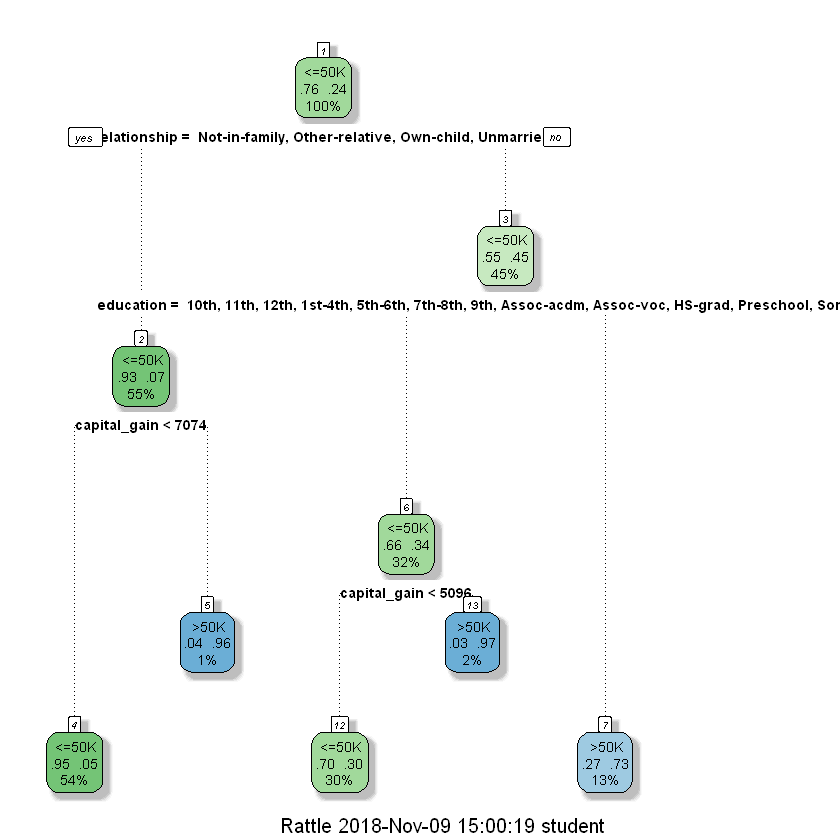

In [12]:
head(adult_clean10, 3)
preProcess_adult_clean10 <- preProcess(adult_clean10, method="knnImpute")
adult_knn <- predict(preProcess_adult_clean10, newdata = adult_clean10)

#hot code the data
adult_clean10$class <- as.numeric(adult_clean10$class)
dummy <- dummyVars( ~ ., data = adult_clean10)
adult_hot10 <- data.frame(predict(dummy, newdata = adult_clean10))

adult_hot10$class[adult_hot10$class == 1] <- " <=50K"
adult_hot10$class[adult_hot10$class == 2] <- " >50K"

preProcess_Scaled10 <- preProcess(adult_hot10, method=c("center", "scale"))
adult_scaled10 <- predict(preProcess_Scaled10, newdata = adult_hot10)

set.seed(2018)
split10 <- createDataPartition(adult_scaled10$class, p = .7, list = FALSE, times = 1)
adult_train10 <- adult[split10,]
adult_test10 <- adult[-split10,]

decision_tree10 <- rpart(class~., data = adult_train10, method = "class")

fancyRpartPlot(decision_tree10)

predicting_test10 <- predict(decision_tree10, adult_test10, type = "class")

conf_matrix10 <- confusionMatrix(data = predicting_test10, reference = adult_test10$class)
conf_matrix10

### 11.	Redo 6 with only scaling and centering the non-encoded variables. Rebuild the model and report the models' performances (the accuracy and balanced accuracy)

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   6997  1149
     >50K     392  1230
                                          
               Accuracy : 0.8422          
                 95% CI : (0.8349, 0.8494)
    No Information Rate : 0.7564          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5201          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9469          
            Specificity : 0.5170          
         Pos Pred Value : 0.8589          
         Neg Pred Value : 0.7583          
             Prevalence : 0.7564          
         Detection Rate : 0.7163          
   Detection Prevalence : 0.8339          
      Balanced Accuracy : 0.7320          
                                          
       'Positive' Class :  <=50K          
                                          

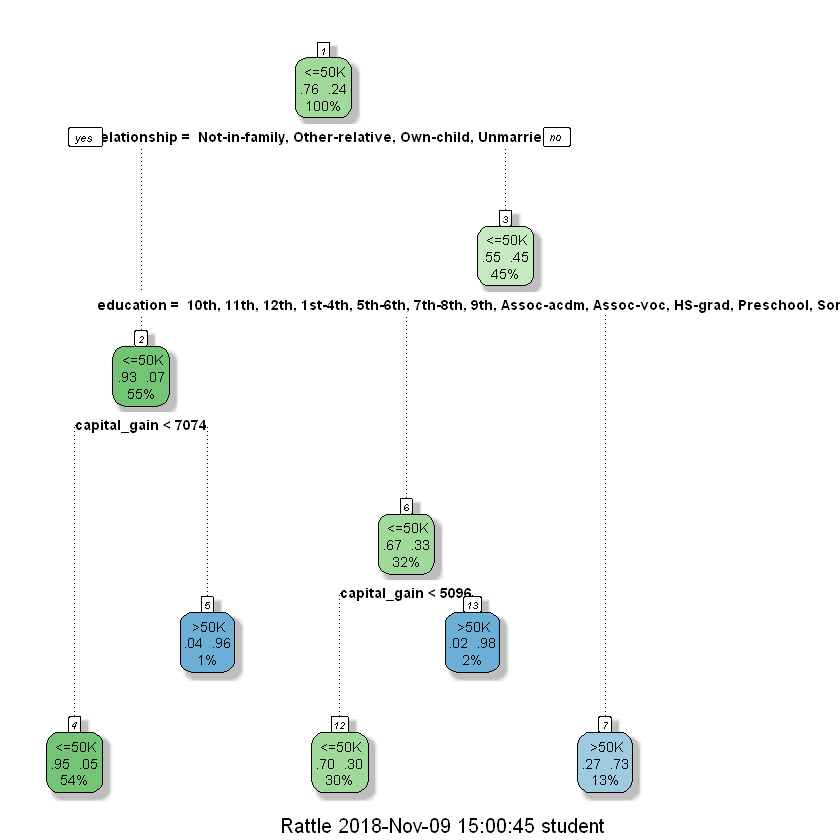

In [13]:
preProcess_Scaled11 <- preProcess(adult_clean, method=c("center", "scale"))
adult_scaled11 <- predict(preProcess_Scaled11, newdata = adult_clean)
#head(adult_scaled11, 3)

adult_scaled11$class <- as.numeric(adult_scaled11$class)
dummy11 <- dummyVars( ~ ., data = adult_clean)
adult_hot11 <- data.frame(predict(dummy11, newdata = adult_clean))


adult_hot11$class[adult_hot11$class == 1] <- " <=50K"
adult_hot11$class[adult_hot11$class == 2] <- " >50K"

split11 <- createDataPartition(adult_scaled11$class, p = .7, list = FALSE, times = 1)
adult_train11 <- adult[split11,]
adult_test11 <- adult[-split11,]

decision_tree11 <- rpart(class~., data = adult_train11, method = "class")

fancyRpartPlot(decision_tree11)

predicting_test11 <- predict(decision_tree11, adult_test11, type = "class")

conf_matrix11 <- confusionMatrix(data = predicting_test11, reference = adult_test11$class)
conf_matrix11

### 12. Redo 5 with a different encoding method. Rebuild the model and report the models' performances (the accuracy and balanced accuracy).

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7060  1182
     >50K     356  1170
                                          
               Accuracy : 0.8425          
                 95% CI : (0.8352, 0.8497)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5107          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9520          
            Specificity : 0.4974          
         Pos Pred Value : 0.8566          
         Neg Pred Value : 0.7667          
             Prevalence : 0.7592          
         Detection Rate : 0.7228          
   Detection Prevalence : 0.8438          
      Balanced Accuracy : 0.7247          
                                          
       'Positive' Class :  <=50K          
                                          

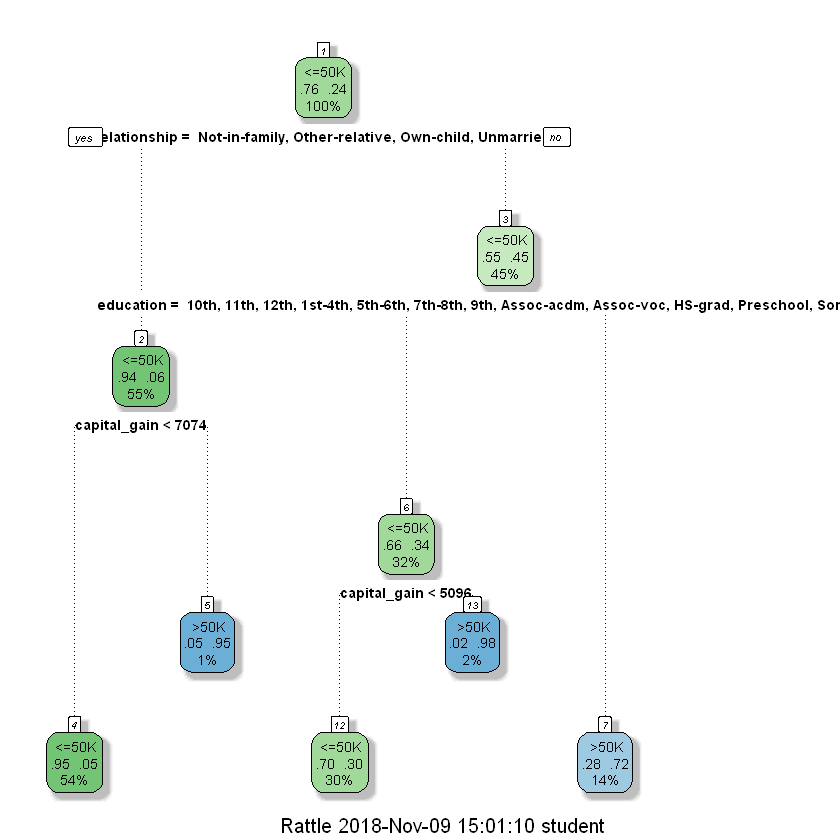

In [14]:
adult_clean12 <- adult_clean

for (i in 1:ncol(adult_clean12))
{
  if (is.factor(adult_clean12[,i])){
    adult_clean12[,i] = as.numeric(adult_clean12[,i])
  }
}

adult_clean12$class[adult_clean12$class == 1] <- " <=50K"
adult_clean12$class[adult_clean12$class == 2] <- " >50K"

split12 <- createDataPartition(adult_clean12$class, p = .7, list = FALSE, times = 1)
adult_train12 <- adult[split12,]
adult_test12 <- adult[-split12,]

decision_tree12 <- rpart(class~., data = adult_train12, method = "class")

fancyRpartPlot(decision_tree12)

predicting_test12 <- predict(decision_tree12, adult_test12, type = "class")

conf_matrix12 <- confusionMatrix(data = predicting_test12, reference = adult_test12$class)
conf_matrix12

### 13.	Skip 4 to rebuild the models.  Do you find any improvement in the models' performances? 

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7028  1151
     >50K     388  1201
                                          
               Accuracy : 0.8424          
                 95% CI : (0.8351, 0.8496)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5154          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9477          
            Specificity : 0.5106          
         Pos Pred Value : 0.8593          
         Neg Pred Value : 0.7558          
             Prevalence : 0.7592          
         Detection Rate : 0.7195          
   Detection Prevalence : 0.8373          
      Balanced Accuracy : 0.7292          
                                          
       'Positive' Class :  <=50K          
                                          

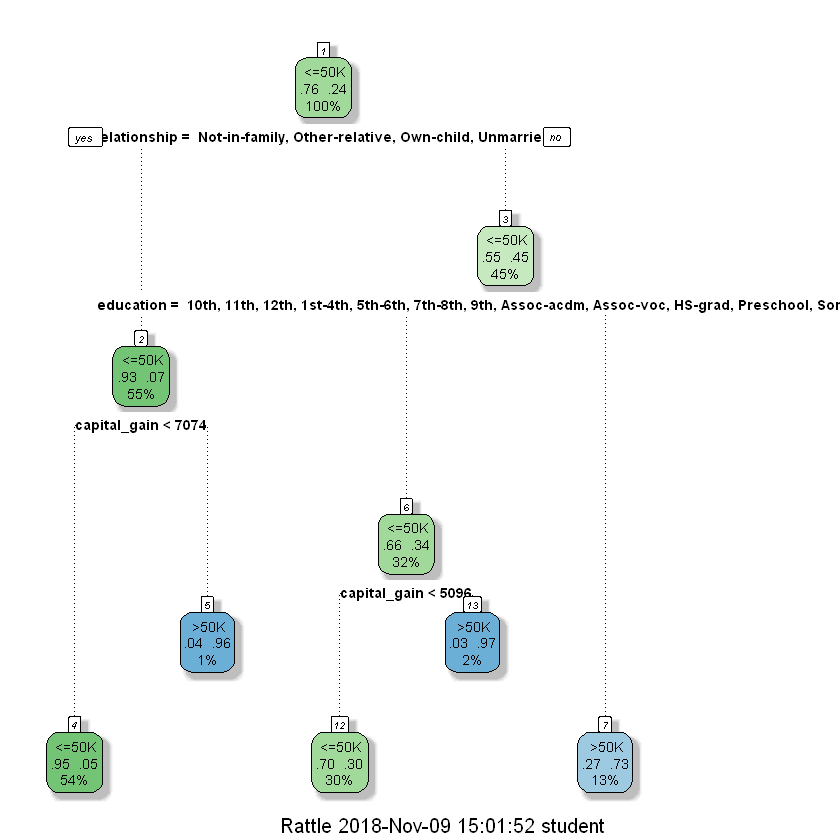

In [15]:
head(adult_clean13, 3)
adult_clean13$class <- as.numeric(adult_clean13$class)
dummy <- dummyVars( ~ ., data = adult_clean13)
adult_hot13 <- data.frame(predict(dummy, newdata = adult_clean13))

adult_hot13$class[adult_hot13$class == 1] <- " <=50K"
adult_hot13$class[adult_hot13$class == 2] <- " >50K"

preProcess_Scaled13 <- preProcess(adult_hot13, method=c("center", "scale"))
adult_scaled13 <- predict(preProcess_Scaled13, newdata = adult_hot13)

set.seed(2018)
split13 <- createDataPartition(adult_scaled13$class, p = .7, list = FALSE, times = 1)
adult_train13 <- adult[split13,]
adult_test13 <- adult[-split13,]

decision_tree13 <- rpart(class~., data = adult_train13, method = "class")

fancyRpartPlot(decision_tree13)

predicting_test13 <- predict(decision_tree13, adult_test13, type = "class")

conf_matrix13 <- confusionMatrix(data = predicting_test13, reference = adult_test13$class)
conf_matrix13

All of the methods used create similar decision trees and classifications rates. Most models produced an accuracy of around 0.84 percent on the testing data although the random forest model did slightly better at 0.86 percent accurancy.